In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
plt.style.use("fivethirtyeight")
%matplotlib inline

# For reading stock data from yahoo
from pandas_datareader.data import DataReader
import yfinance as yf

# For time stamps
from datetime import datetime

In [2]:
# The tech stocks we'll use for this analysis
tech_list = ['SOXL']

# Set up End and Start times for data grab
tech_list = ['SOXL']

end = datetime.now()
start = datetime(end.year - 5, end.month, end.day)

for stock in tech_list:
    globals()[stock] = yf.download(stock, start, end)

[*********************100%***********************]  1 of 1 completed


In [3]:
company_list = [SOXL]
company_name = ["SOXL"]

for company, com_name in zip(company_list, company_name):
    company["company_name"] = com_name
    
data = pd.concat(company_list, axis=0)
data.tail(10)

,Open,High,Low,Close,Adj Close,Volume,company_name
Date,,,,,,,
2022-11-29,11.95,12.18,11.50,11.73,11.73,75056000,SOXL
2022-11-30,11.84,13.85,11.52,13.82,13.82,133385800,SOXL
2022-12-01,14.09,14.13,12.94,13.50,13.50,112133900,SOXL
2022-12-02,12.49,13.13,12.30,13.03,13.03,97725700,SOXL
2022-12-05,12.80,13.16,12.20,12.59,12.59,71095100,SOXL
2022-12-06,12.54,12.60,11.38,11.72,11.72,86923400,SOXL
2022-12-07,11.41,11.93,11.33,11.70,11.70,86276700,SOXL
2022-12-08,11.89,12.72,11.65,12.62,12.62,101888300,SOXL
2022-12-09,12.49,12.99,12.18,12.32,12.32,88429900,SOXL


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1259 entries, 2017-12-12 to 2022-12-12
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          1259 non-null   float64
 1   High          1259 non-null   float64
 2   Low           1259 non-null   float64
 3   Close         1259 non-null   float64
 4   Adj Close     1259 non-null   float64
 5   Volume        1259 non-null   int64  
 6   company_name  1259 non-null   object 
dtypes: float64(5), int64(1), object(1)
memory usage: 78.7+ KB


In [5]:
length_data = len(data)     # rows that data has
split_ratio = 0.7           # %70 train + %30 validation
length_train = round(length_data * split_ratio)  
length_validation = length_data - length_train
print("Data length :", length_data)
print("Train data length :", length_train)
print("Validation data lenth :", length_validation)

Data length : 1259
Train data length : 881
Validation data lenth : 378


In [6]:
train_data = data[:length_train].iloc[:,:1]
# train_data['Date'] = pd.to_datetime(train_data['Date'])  # converting to date time object
train_data

,Open
Date,
2017-12-12,9.000000
2017-12-13,8.884667
2017-12-14,8.787333
2017-12-15,8.866667
2017-12-18,9.516667
...,...
2021-06-08,39.799999
2021-06-09,38.560001
2021-06-10,37.799999


In [7]:
validation_data = data[length_train:].iloc[:,:1]
# validation_data['Date'] = pd.to_datetime(validation_data['Date'])  # converting to date time object
validation_data

,Open
Date,
2021-06-15,40.799999
2021-06-16,40.490002
2021-06-17,38.689999
2021-06-18,39.290001
2021-06-21,37.549999
...,...
2022-12-06,12.540000
2022-12-07,11.410000
2022-12-08,11.890000


In [8]:
dataset_train = train_data.Open.values
dataset_train.shape

(881,)

In [9]:
# Change 1d array to 2d array
# Changing shape from (1692,) to (1692,1)
dataset_train = np.reshape(dataset_train, (-1,1))
dataset_train.shape

(881, 1)

In [10]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range = (0,1))


# scaling dataset
dataset_train_scaled = scaler.fit_transform(dataset_train)

dataset_train_scaled.shape

(881, 1)

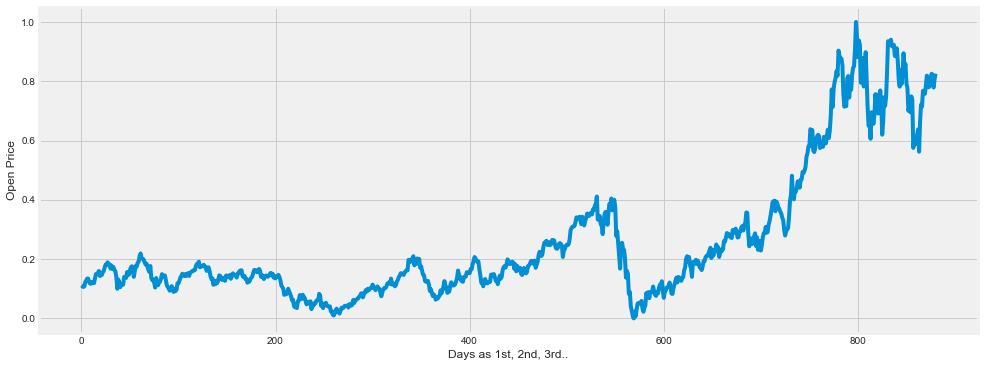

In [11]:
plt.subplots(figsize = (15,6))
plt.plot(dataset_train_scaled)
plt.xlabel("Days as 1st, 2nd, 3rd..")
plt.ylabel("Open Price")
plt.show()

In [12]:
X_train = []
y_train = []

time_step = 60

for i in range(time_step, length_train):
    X_train.append(dataset_train_scaled[i-time_step:i,0])
    y_train.append(dataset_train_scaled[i,0])
    
# convert list to array
X_train, y_train = np.array(X_train), np.array(y_train)

In [13]:
print("Shape of X_train before reshape :",X_train.shape)
print("Shape of y_train before reshape :",y_train.shape)

Shape of X_train before reshape : (821, 60)
Shape of y_train before reshape : (821,)


In [14]:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1],1))
y_train = np.reshape(y_train, (y_train.shape[0],1))

print("Shape of X_train after reshape :",X_train.shape)
print("Shape of y_train after reshape :",y_train.shape)

Shape of X_train after reshape : (821, 60, 1)
Shape of y_train after reshape : (821, 1)


In [15]:
y_train[0]

array([0.21021305])

# 6.Creating RNN model

In [16]:
# importing libraries
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import SimpleRNN
from keras.layers import Dropout

# initializing the RNN
regressor = Sequential()

# adding first RNN layer and dropout regulatization
regressor.add(SimpleRNN(units = 50, activation = "tanh", return_sequences = True, input_shape = (X_train.shape[1],1)))
regressor.add(Dropout(0.2))
regressor.add(SimpleRNN(units = 50, activation = "tanh", return_sequences = True))
regressor.add(Dropout(0.2))
regressor.add(SimpleRNN(units = 50, activation = "tanh", return_sequences = True))
regressor.add(Dropout(0.2))
# adding fourth RNN layer and dropout regulatization
regressor.add(SimpleRNN(units = 50))
regressor.add(Dropout(0.2))
# adding the output layer
regressor.add(Dense(units = 1))

# compiling RNN
regressor.compile(optimizer = "adam", loss = "mean_squared_error", metrics = ["accuracy"])

# fitting the RNN
history = regressor.fit(X_train, y_train, epochs = 50, batch_size = 32)

Epoch 1/50
26/26 [==============================] - 4s 31ms/step - loss: 0.5290 - accuracy: 0.0012
Epoch 2/50
26/26 [==============================] - 1s 32ms/step - loss: 0.3013 - accuracy: 0.0012
Epoch 3/50
26/26 [==============================] - 1s 33ms/step - loss: 0.2716 - accuracy: 0.0012
Epoch 4/50
26/26 [==============================] - 1s 33ms/step - loss: 0.2319 - accuracy: 0.0024
Epoch 5/50
26/26 [==============================] - 1s 36ms/step - loss: 0.2064 - accuracy: 0.0024
Epoch 6/50
26/26 [==============================] - 1s 36ms/step - loss: 0.1912 - accuracy: 0.0024
Epoch 7/50
26/26 [==============================] - 1s 31ms/step - loss: 0.1817 - accuracy: 0.0000e+00
Epoch 8/50
26/26 [==============================] - 1s 39ms/step - loss: 0.1472 - accuracy: 0.0024
Epoch 9/50
26/26 [==============================] - 1s 43ms/step - loss: 0.1144 - accuracy: 0.0000e+00
Epoch 10/50
26/26 [==============================] - 1s 51ms/step - loss: 0.0997 - accuracy: 0.0024
E

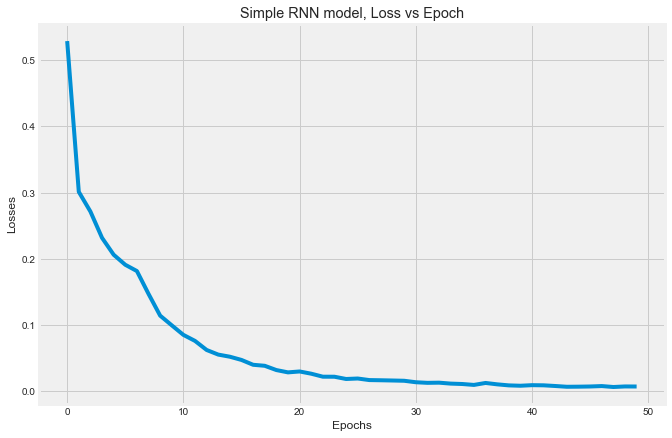

In [17]:
# Plotting Loss vs Epochs
plt.figure(figsize =(10,7))
plt.plot(history.history["loss"])
plt.xlabel("Epochs")
plt.ylabel("Losses")
plt.title("Simple RNN model, Loss vs Epoch")
plt.show()

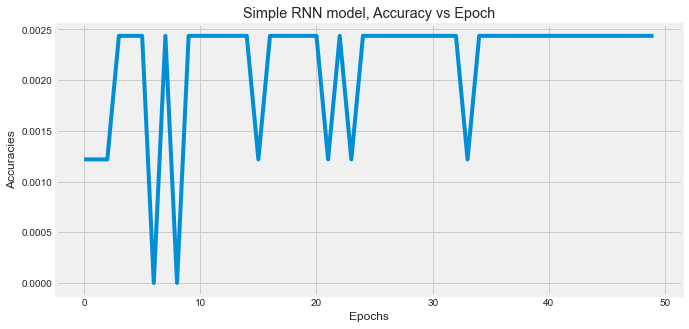

In [18]:
# Plotting Accuracy vs Epochs
plt.figure(figsize =(10,5))
plt.plot(history.history["accuracy"])
plt.xlabel("Epochs")
plt.ylabel("Accuracies")
plt.title("Simple RNN model, Accuracy vs Epoch")
plt.show()

In [19]:
y_pred = regressor.predict(X_train)  # predictions
y_pred = scaler.inverse_transform(y_pred) # scaling back from 0-1 to original
y_pred.shape

26/26 [==============================] - 1s 10ms/step


(821, 1)

In [20]:
y_train = scaler.inverse_transform(y_train) # scaling back from 0-1 to original
y_train.shape

(821, 1)

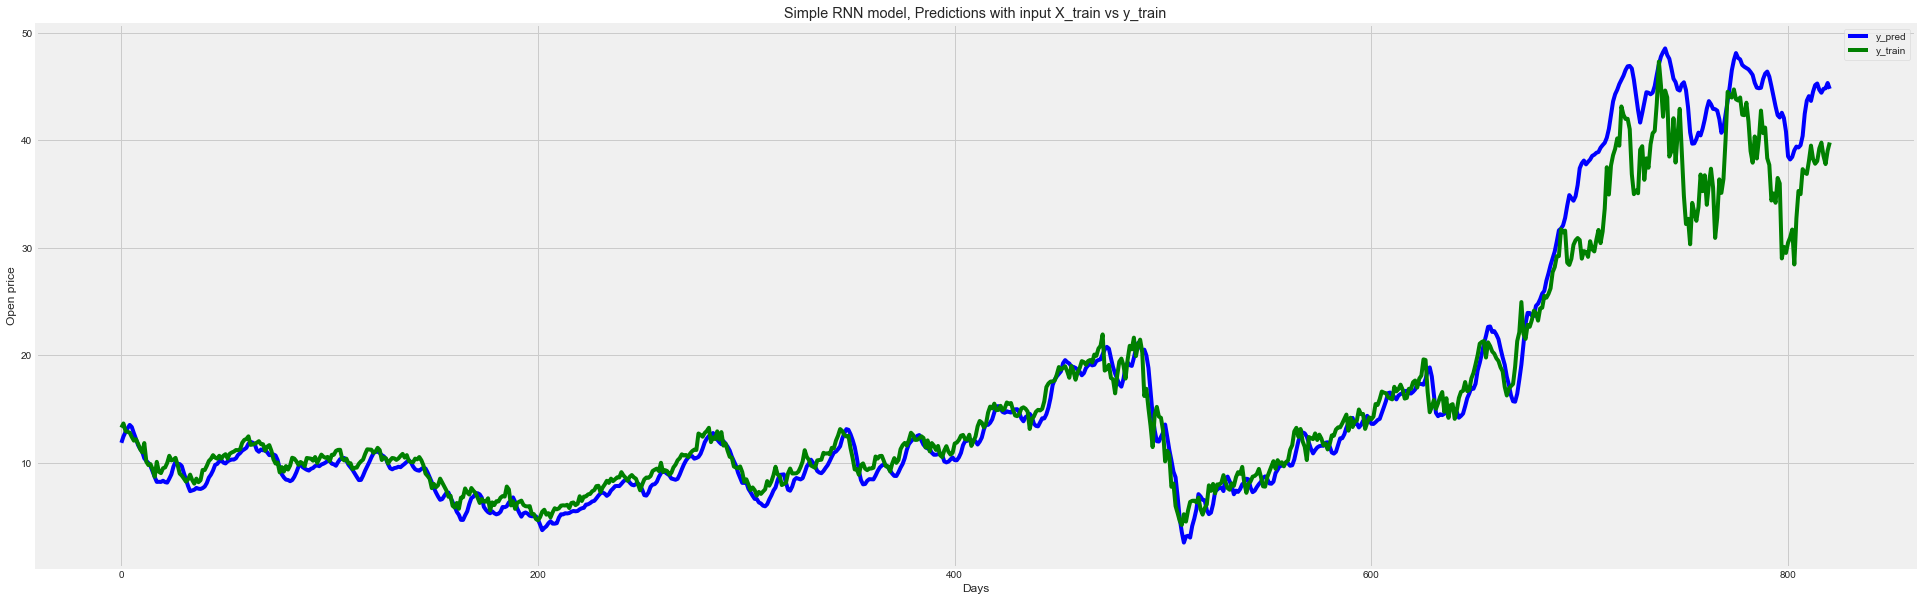

In [21]:
# visualisation
plt.figure(figsize = (30,10))
plt.plot(y_pred, color = "b", label = "y_pred" )
plt.plot(y_train, color = "g", label = "y_train")
plt.xlabel("Days")
plt.ylabel("Open price")
plt.title("Simple RNN model, Predictions with input X_train vs y_train")
plt.legend()
plt.show()

In [22]:
dataset_validation = validation_data.Open.values  # getting "open" column and converting to array
dataset_validation = np.reshape(dataset_validation, (-1,1))  # converting 1D to 2D array
scaled_dataset_validation =  scaler.fit_transform(dataset_validation)  # scaling open values to between 0 and 1
print("Shape of scaled validation dataset :",scaled_dataset_validation.shape)

Shape of scaled validation dataset : (378, 1)


In [23]:
# Creating X_test and y_test
X_test = []
y_test = []

for i in range(time_step, length_validation):
    X_test.append(scaled_dataset_validation[i-time_step:i,0])
    y_test.append(scaled_dataset_validation[i,0])

In [24]:
# Converting to array
X_test, y_test = np.array(X_test), np.array(y_test)
print("Shape of X_test before reshape :",X_test.shape)
print("Shape of y_test before reshape :",y_test.shape)

Shape of X_test before reshape : (318, 60)
Shape of y_test before reshape : (318,)


In [25]:
X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1],1))  # reshape to 3D array
y_test = np.reshape(y_test, (-1,1))  # reshape to 2D array
print("Shape of X_test after reshape :",X_test.shape)
print("Shape of y_test after reshape :",y_test.shape)

Shape of X_test after reshape : (318, 60, 1)
Shape of y_test after reshape : (318, 1)


In [26]:
# predictions with X_test data
y_pred_of_test = regressor.predict(X_test)
# scaling back from 0-1 to original
y_pred_of_test = scaler.inverse_transform(y_pred_of_test) 
print("Shape of y_pred_of_test :",y_pred_of_test.shape)

10/10 [==============================] - 0s 11ms/step
Shape of y_pred_of_test : (318, 1)


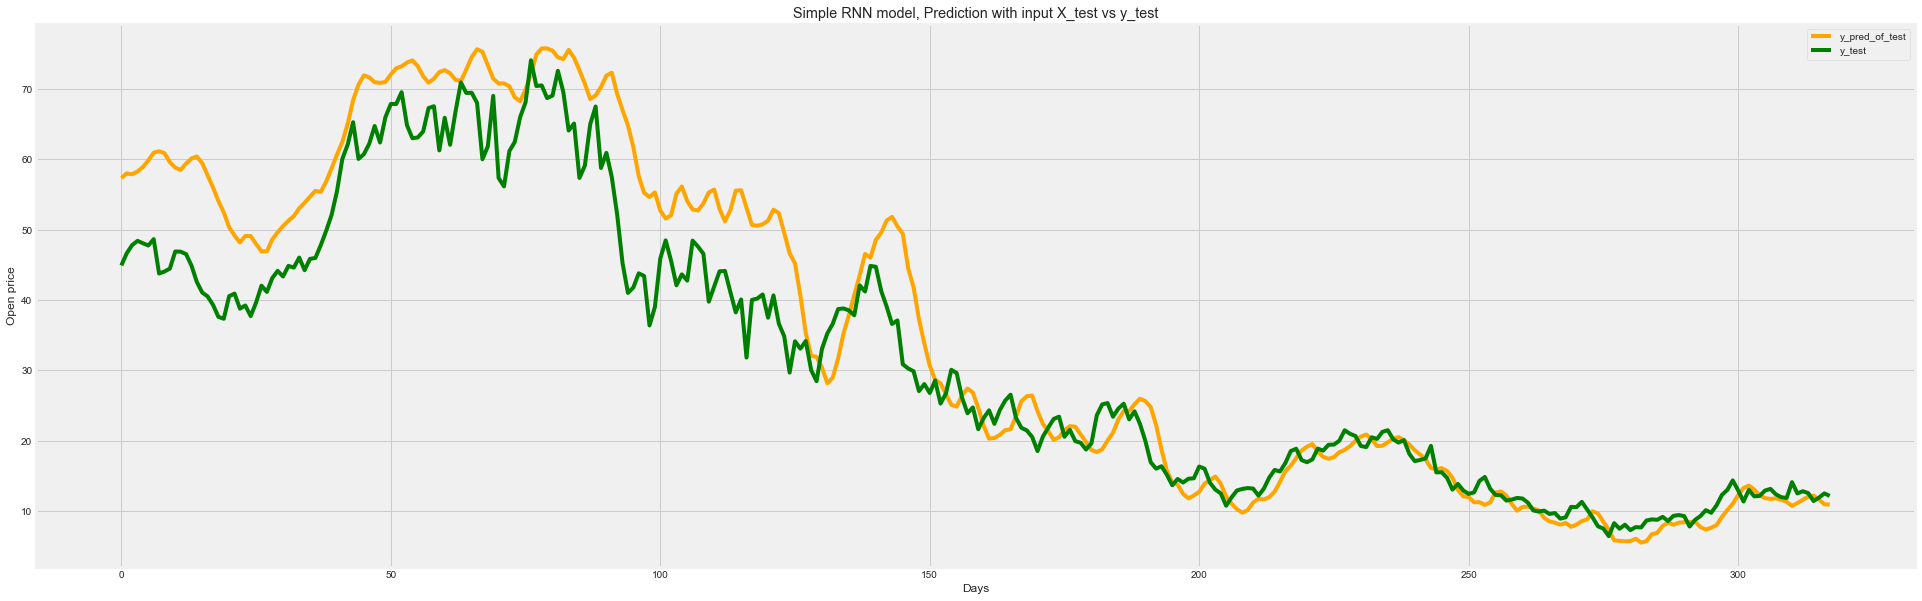

In [27]:
# visualisation
plt.figure(figsize = (30,10))
plt.plot(y_pred_of_test, label = "y_pred_of_test", c = "orange")
plt.plot(scaler.inverse_transform(y_test), label = "y_test", c = "g")
plt.xlabel("Days")
plt.ylabel("Open price")
plt.title("Simple RNN model, Prediction with input X_test vs y_test")
plt.legend()
plt.show()

In [28]:
# train_data.index[time_step:]

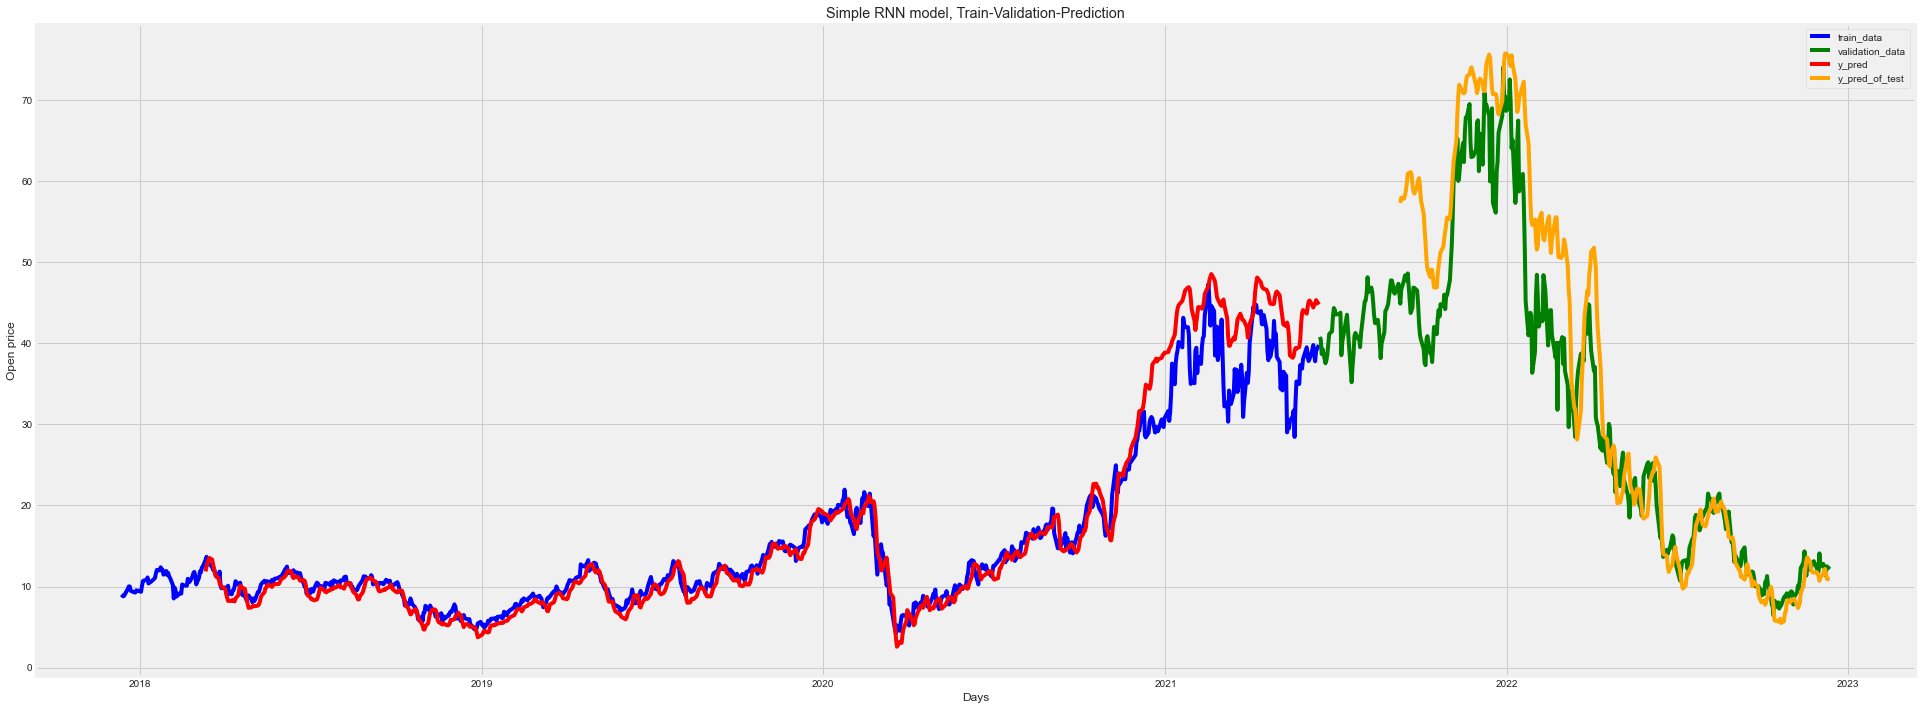

In [29]:
# Visualisation
plt.subplots(figsize =(30,12))
plt.plot(train_data.index, train_data.Open, label = "train_data", color = "b")
plt.plot(validation_data.index, validation_data.Open, label = "validation_data", color = "g")
plt.plot(train_data.index[time_step:], y_pred, label = "y_pred", color = "r")
plt.plot(validation_data.index[time_step:], y_pred_of_test, label = "y_pred_of_test", color = "orange")
plt.xlabel("Days")
plt.ylabel("Open price")
plt.title("Simple RNN model, Train-Validation-Prediction")
plt.legend()
plt.show()

# Creating LSTM Model

In [30]:
y_train = scaler.fit_transform(y_train)

In [31]:
from keras.layers import LSTM

model_lstm = Sequential()
model_lstm.add(
    LSTM(64,return_sequences=True,input_shape = (X_train.shape[1],1))) #64 lstm neuron block
model_lstm.add(
    LSTM(64, return_sequences= False))
model_lstm.add(Dense(32))
model_lstm.add(Dense(1))
model_lstm.compile(loss = "mean_squared_error", optimizer = "adam", metrics = ["accuracy"])
history2 = model_lstm.fit(X_train, y_train, epochs = 10, batch_size = 10)

Epoch 1/10
83/83 [==============================] - 8s 35ms/step - loss: 0.0115 - accuracy: 0.0012
Epoch 2/10
83/83 [==============================] - 3s 34ms/step - loss: 0.0029 - accuracy: 0.0024
Epoch 3/10
83/83 [==============================] - 3s 34ms/step - loss: 0.0022 - accuracy: 0.0024
Epoch 4/10
83/83 [==============================] - 3s 34ms/step - loss: 0.0026 - accuracy: 0.0024
Epoch 5/10
83/83 [==============================] - 3s 34ms/step - loss: 0.0019 - accuracy: 0.0024
Epoch 6/10
83/83 [==============================] - 3s 34ms/step - loss: 0.0015 - accuracy: 0.0024
Epoch 7/10
83/83 [==============================] - 3s 34ms/step - loss: 0.0015 - accuracy: 0.0024
Epoch 8/10
83/83 [==============================] - 3s 34ms/step - loss: 0.0017 - accuracy: 0.0024
Epoch 9/10
83/83 [==============================] - 3s 34ms/step - loss: 0.0012 - accuracy: 0.0024
Epoch 10/10
83/83 [==============================] - 3s 34ms/step - loss: 0.0011 - accuracy: 0.0024


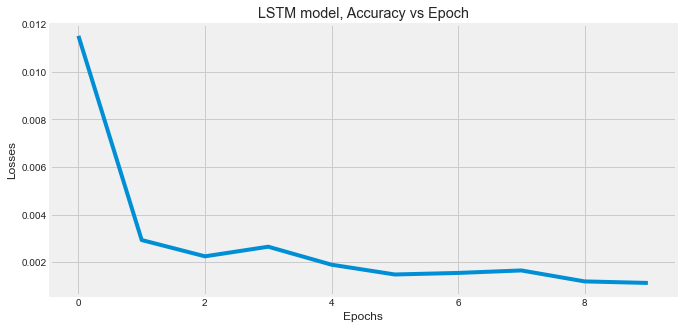

In [32]:
plt.figure(figsize =(10,5))
plt.plot(history2.history["loss"])
plt.xlabel("Epochs")
plt.ylabel("Losses")
plt.title("LSTM model, Accuracy vs Epoch")
plt.show()

10/10 [==============================] - 1s 16ms/step


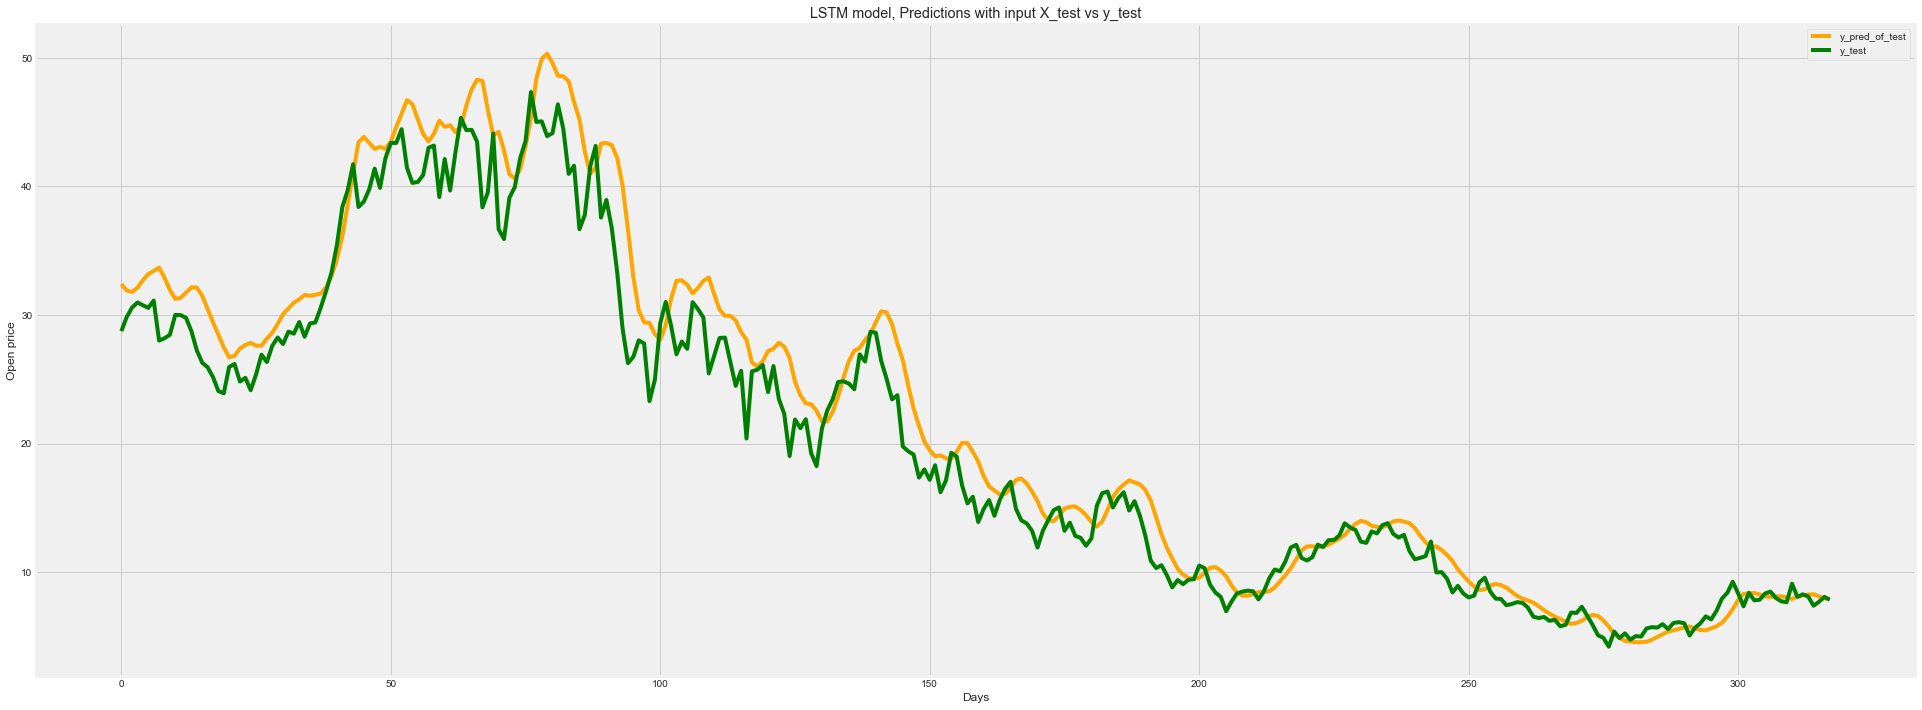

In [33]:
plt.subplots(figsize =(30,12))
plt.plot(scaler.inverse_transform(model_lstm.predict(X_test)), label = "y_pred_of_test", c = "orange" )
plt.plot(scaler.inverse_transform(y_test), label = "y_test", color = "g")
plt.xlabel("Days")
plt.ylabel("Open price")
plt.title("LSTM model, Predictions with input X_test vs y_test")
plt.legend()
plt.show()

# CNN-LSTM

In [34]:
# from sklearn.model_selection import train_test_split

# x_train, x_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.2, shuffle=True)

# x_train = np.array(x_train)
# x_test = np.array(x_test)
# y_train = np.array(y_train)
# y_test = np.array(y_test)

In [35]:
# x_train.shape

In [36]:
# x_train.reshape(x_train.shape[0],1,50,1).shape

In [37]:
X_train1 = X_train.reshape(X_train.shape[0],1,time_step,1)
X_test1 = X_test.reshape(X_test.shape[0],1,time_step,1)

print(len(X_train1))
print(len(X_test1))

821
318


In [38]:
X_train1.shape[2]

60

In [39]:
import tensorflow as tf
from tensorflow.keras.layers import Conv1D, LSTM, Dense, Dropout, Bidirectional, TimeDistributed
from tensorflow.keras.layers import MaxPooling1D, Flatten
from tensorflow.keras.regularizers import L1, L2
from tensorflow.keras.metrics import Accuracy
from tensorflow.keras.metrics import RootMeanSquaredError


model_CNN_LSTM = tf.keras.Sequential()

# Creating the Neural Network model here...
# CNN layers
model_CNN_LSTM.add(TimeDistributed(Conv1D(64, kernel_size=3, activation='relu', input_shape=(None, X_train1.shape[2], 1))))
model_CNN_LSTM.add(TimeDistributed(MaxPooling1D(2)))
model_CNN_LSTM.add(TimeDistributed(Conv1D(128, kernel_size=3, activation='relu')))
model_CNN_LSTM.add(TimeDistributed(MaxPooling1D(2)))
model_CNN_LSTM.add(TimeDistributed(Conv1D(64, kernel_size=3, activation='relu')))
model_CNN_LSTM.add(TimeDistributed(MaxPooling1D(2)))
model_CNN_LSTM.add(TimeDistributed(Flatten()))
# model.add(Dense(5, kernel_regularizer=L2(0.01)))

# LSTM layers
model_CNN_LSTM.add(Bidirectional(LSTM(100, return_sequences=True)))
model_CNN_LSTM.add(Dropout(0.5))
model_CNN_LSTM.add(Bidirectional(LSTM(100, return_sequences=False)))
model_CNN_LSTM.add(Dropout(0.5))

#Final layers
model_CNN_LSTM.add(Dense(1, activation='linear'))
model_CNN_LSTM.compile(loss='mean_squared_error', optimizer='adam', metrics=['accuracy'])

history3 = model_CNN_LSTM.fit(X_train1, y_train, epochs=40,batch_size=32, verbose=1, shuffle =True)

Epoch 1/40
26/26 [==============================] - 12s 22ms/step - loss: 0.0409 - accuracy: 0.0012
Epoch 2/40
26/26 [==============================] - 1s 23ms/step - loss: 0.0114 - accuracy: 0.0024
Epoch 3/40
26/26 [==============================] - 0s 18ms/step - loss: 0.0099 - accuracy: 0.0024
Epoch 4/40
26/26 [==============================] - 1s 19ms/step - loss: 0.0083 - accuracy: 0.0024
Epoch 5/40
26/26 [==============================] - 0s 19ms/step - loss: 0.0072 - accuracy: 0.0024
Epoch 6/40
26/26 [==============================] - 0s 18ms/step - loss: 0.0066 - accuracy: 0.0024
Epoch 7/40
26/26 [==============================] - 0s 19ms/step - loss: 0.0067 - accuracy: 0.0024
Epoch 8/40
26/26 [==============================] - 0s 19ms/step - loss: 0.0074 - accuracy: 0.0024
Epoch 9/40
26/26 [==============================] - 0s 18ms/step - loss: 0.0074 - accuracy: 0.0024
Epoch 10/40
26/26 [==============================] - 0s 19ms/step - loss: 0.0062 - accuracy: 0.0024
Epoch 11

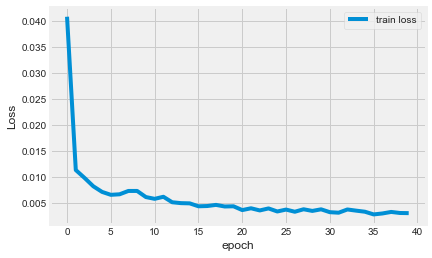

In [40]:
plt.plot(history3.history['loss'], label='train loss')
# plt.plot(history3.history['val_loss'], label='val loss')
plt.xlabel("epoch")
plt.ylabel("Loss")
plt.legend()

In [41]:
# plt.plot(history3.history['accuracy'], label='train acc')
# plt.plot(history.history['val_accuracy'], label='val acc')
# plt.xlabel("epoch")
# plt.ylabel("accuracy")
# plt.legend()

10/10 [==============================] - 2s 7ms/step


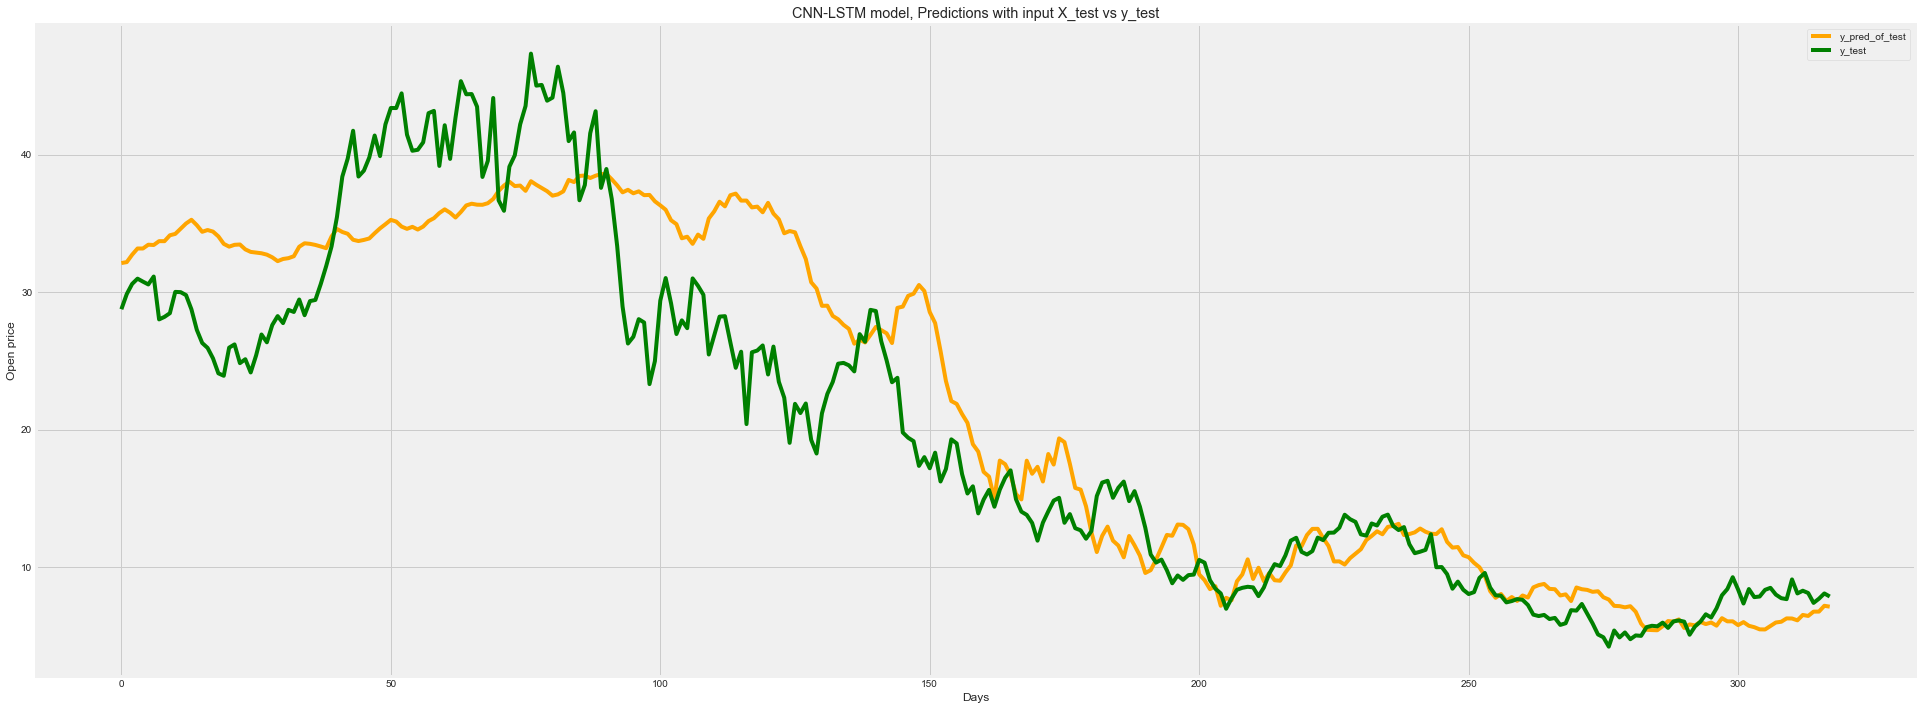

In [42]:
plt.subplots(figsize =(30,12))
plt.plot(scaler.inverse_transform(model_CNN_LSTM.predict(X_test1)), label = "y_pred_of_test", c = "orange" )
plt.plot(scaler.inverse_transform(y_test), label = "y_test", color = "g")
plt.xlabel("Days")
plt.ylabel("Open price")
plt.title("CNN-LSTM model, Predictions with input X_test vs y_test")
plt.legend()
plt.show()

# GRUs

In [43]:
from keras.layers import GRU

GRU_model = Sequential()
GRU_model.add(
    GRU(64,return_sequences=True,input_shape = (X_train.shape[1],1))) #64 lstm neuron block
GRU_model.add(
    GRU(64, return_sequences= False))
GRU_model.add(Dense(32))
GRU_model.add(Dense(1))
GRU_model.compile(loss = "mean_squared_error", optimizer = "adam", metrics = ["accuracy"])
history4 = GRU_model.fit(X_train, y_train, epochs = 10, batch_size = 10)

Epoch 1/10
83/83 [==============================] - 8s 36ms/step - loss: 0.0061 - accuracy: 0.0024
Epoch 2/10
83/83 [==============================] - 3s 35ms/step - loss: 0.0011 - accuracy: 0.0024
Epoch 3/10
83/83 [==============================] - 3s 36ms/step - loss: 0.0011 - accuracy: 0.0024
Epoch 4/10
83/83 [==============================] - 3s 36ms/step - loss: 9.9324e-04 - accuracy: 0.0024
Epoch 5/10
83/83 [==============================] - 3s 36ms/step - loss: 0.0010 - accuracy: 0.0024
Epoch 6/10
83/83 [==============================] - 3s 35ms/step - loss: 0.0011 - accuracy: 0.0024
Epoch 7/10
83/83 [==============================] - 3s 35ms/step - loss: 8.7971e-04 - accuracy: 0.0024
Epoch 8/10
83/83 [==============================] - 3s 36ms/step - loss: 8.5404e-04 - accuracy: 0.0024
Epoch 9/10
83/83 [==============================] - 3s 36ms/step - loss: 7.9983e-04 - accuracy: 0.0024
Epoch 10/10
83/83 [==============================] - 3s 36ms/step - loss: 7.6687e-04 - accura

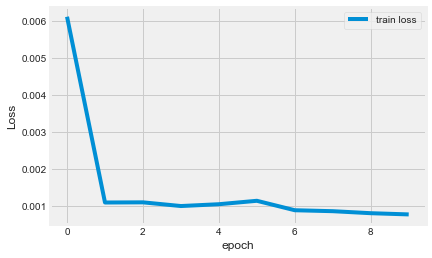

In [44]:
plt.plot(history4.history['loss'], label='train loss')
# plt.plot(history4.history['val_loss'], label='val loss')
plt.xlabel("epoch")
plt.ylabel("Loss")
plt.legend()

10/10 [==============================] - 1s 13ms/step


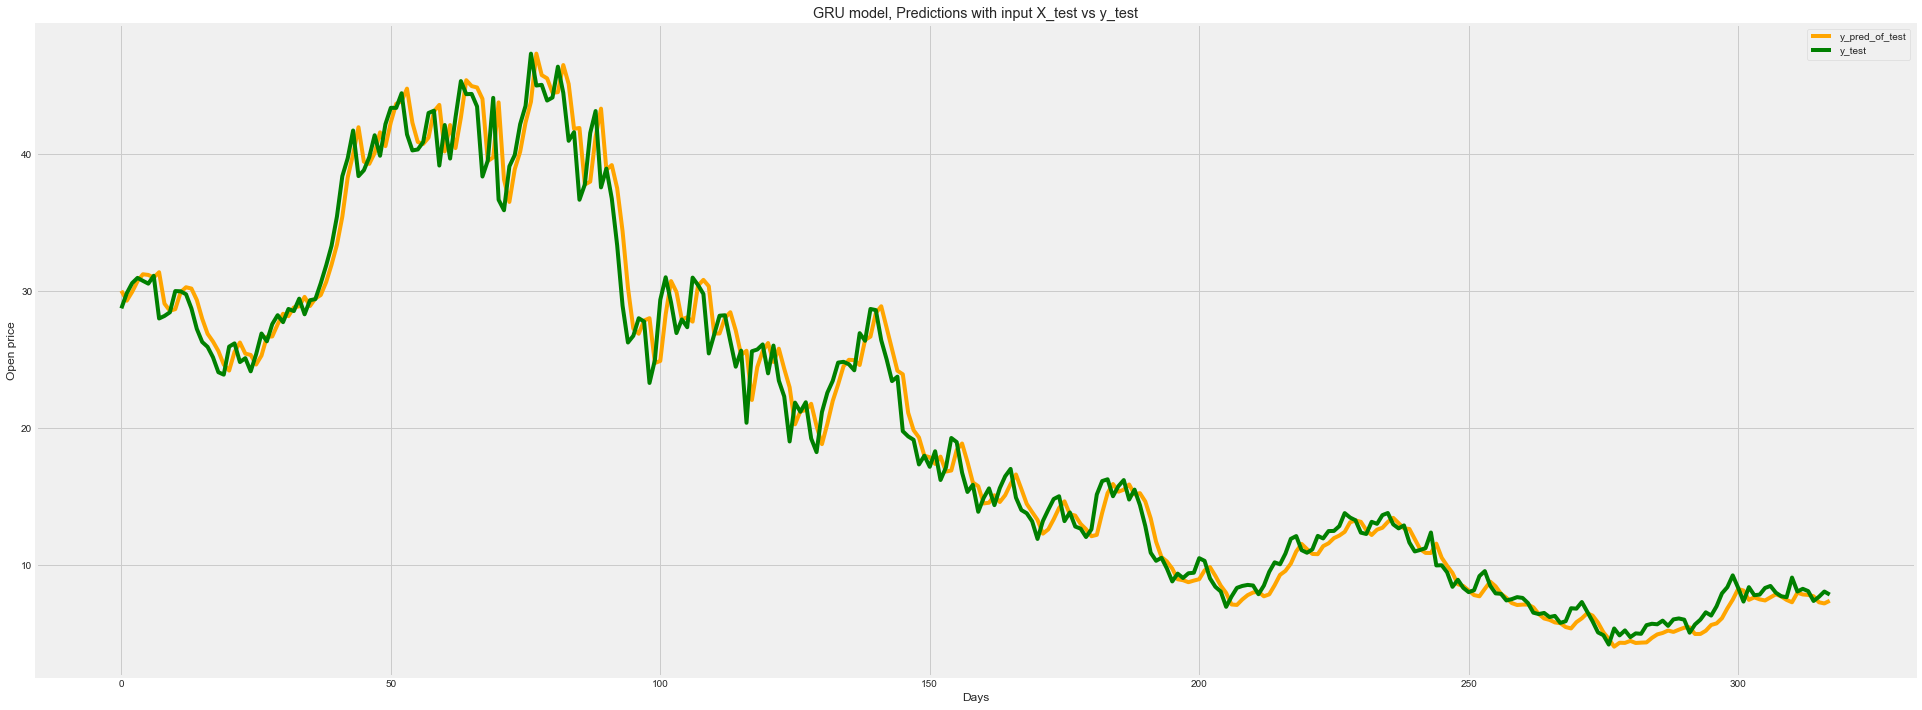

In [45]:
plt.subplots(figsize =(30,12))
plt.plot(scaler.inverse_transform(GRU_model.predict(X_test)), label = "y_pred_of_test", c = "orange" )
plt.plot(scaler.inverse_transform(y_test), label = "y_test", color = "g")
plt.xlabel("Days")
plt.ylabel("Open price")
plt.title("GRU model, Predictions with input X_test vs y_test")
plt.legend()
plt.show()

# 1D CNN + GRU

In [46]:
CNN_GRU_model = Sequential()
CNN_GRU_model.add(
    Conv1D(filters=20, kernel_size=4, strides=2, padding="valid", input_shape=[X_train.shape[1], 1]))
CNN_GRU_model.add(
    GRU(64,return_sequences=True)) #64 lstm neuron block
CNN_GRU_model.add(
    GRU(64, return_sequences= False))
CNN_GRU_model.add(Dense(32))
CNN_GRU_model.add(Dense(1))
CNN_GRU_model.compile(loss = "mean_squared_error", optimizer = "adam", metrics = ["accuracy"])
history5 = CNN_GRU_model.fit(X_train, y_train, epochs = 10, batch_size = 10)

Epoch 1/10
83/83 [==============================] - 8s 37ms/step - loss: 0.0081 - accuracy: 0.0024
Epoch 2/10
83/83 [==============================] - 2s 26ms/step - loss: 0.0027 - accuracy: 0.0024
Epoch 3/10
83/83 [==============================] - 2s 25ms/step - loss: 0.0013 - accuracy: 0.0024
Epoch 4/10
83/83 [==============================] - 2s 25ms/step - loss: 0.0013 - accuracy: 0.0024
Epoch 5/10
83/83 [==============================] - 2s 26ms/step - loss: 0.0011 - accuracy: 0.0024
Epoch 6/10
83/83 [==============================] - 2s 25ms/step - loss: 9.7016e-04 - accuracy: 0.0024
Epoch 7/10
83/83 [==============================] - 2s 22ms/step - loss: 8.8152e-04 - accuracy: 0.0024
Epoch 8/10
83/83 [==============================] - 2s 24ms/step - loss: 8.9135e-04 - accuracy: 0.0024
Epoch 9/10
83/83 [==============================] - 2s 21ms/step - loss: 0.0010 - accuracy: 0.0024
Epoch 10/10
83/83 [==============================] - 2s 22ms/step - loss: 8.7999e-04 - accuracy: 

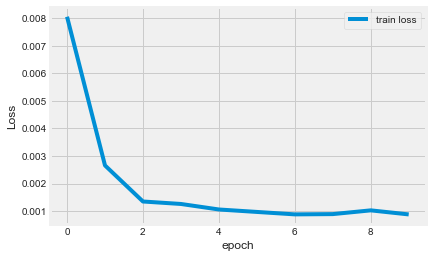

In [47]:
plt.plot(history5.history['loss'], label='train loss')
# plt.plot(history4.history['val_loss'], label='val loss')
plt.xlabel("epoch")
plt.ylabel("Loss")
plt.legend()

10/10 [==============================] - 1s 9ms/step


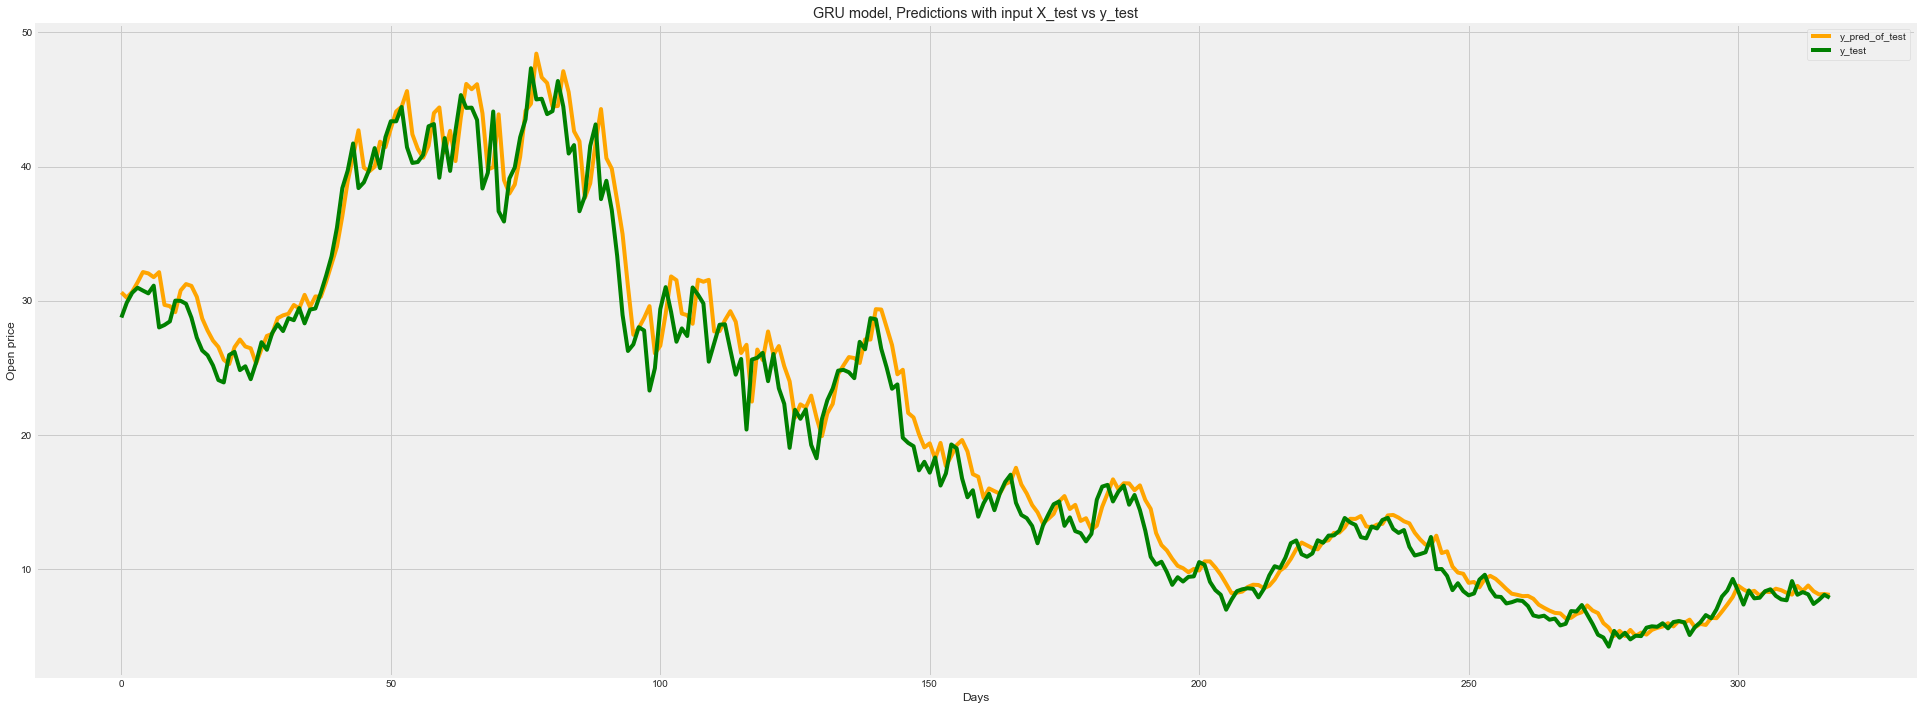

In [48]:
plt.subplots(figsize =(30,12))
plt.plot(scaler.inverse_transform(CNN_GRU_model.predict(X_test)), label = "y_pred_of_test", c = "orange" )
plt.plot(scaler.inverse_transform(y_test), label = "y_test", color = "g")
plt.xlabel("Days")
plt.ylabel("Open price")
plt.title("GRU model, Predictions with input X_test vs y_test")
plt.legend()
plt.show()

# Stock predict

In [49]:
data.iloc[-1]

Open               12.14
High               13.01
Low                11.94
Close              12.98
Adj Close          12.98
Volume          72940500
company_name        SOXL
Name: 2022-12-12 00:00:00, dtype: object

In [50]:
X_inputT = data.iloc[-time_step:].Open.values               # getting last 50 rows and converting to array
X_inputT = scaler.fit_transform(X_inputT.reshape(-1,1))      # converting to 2D array and scaling
X_input = np.reshape(X_inputT, (1,time_step,1))                    # reshaping : converting to 3D array
X_input1 = np.reshape(X_inputT, (1,1,time_step,1))                    # reshaping : converting to 3D array
print("Shape of X_input :", X_input.shape)
print("Shape of X_inputT :", X_input1.shape)

Shape of X_input : (1, 60, 1)
Shape of X_inputT : (1, 1, 60, 1)


In [51]:
from datetime import datetime, date, timedelta

current_date = datetime.today() + timedelta(days=1)
current_date = datetime.strftime(current_date, '%m-%d-%Y')

In [52]:
import datetime

x = datetime.datetime.now()

simple_RNN_prediction = scaler.inverse_transform(regressor.predict(X_input))
LSTM_prediction = scaler.inverse_transform(model_lstm.predict(X_input))
CNN_LSTM_prediction = scaler.inverse_transform(model_CNN_LSTM.predict(X_input1))
GRU_prediction = scaler.inverse_transform(GRU_model.predict(X_input))
GRU_CNN_prediction = scaler.inverse_transform(CNN_GRU_model.predict(X_input))
print("Simple RNN, Open price prediction for ", current_date, ":", simple_RNN_prediction[0,0])
print("LSTM prediction, Open price prediction for ", current_date, ":", LSTM_prediction[0,0])
print("CNN-LSTM prediction, Open price prediction for ", current_date, ":", CNN_LSTM_prediction[0,0])
print("GRU prediction, Open price prediction for ", current_date, ":", GRU_prediction[0,0])
print("GRU-1D CNN prediction, Open price prediction for ", current_date, ":", GRU_CNN_prediction[0,0])

1/1 [==============================] - 0s 35ms/step
Simple RNN, Open price prediction for  12-13-2022 : 13.20902
LSTM prediction, Open price prediction for  12-13-2022 : 12.58524
CNN-LSTM prediction, Open price prediction for  12-13-2022 : 12.073179
GRU prediction, Open price prediction for  12-13-2022 : 12.273602
GRU-1D CNN prediction, Open price prediction for  12-13-2022 : 12.576332
